# Introduction
This goal of this project is to explore two methods for calculating disparity maps from pairs of stereo images. The first method is a simple window-based search. The second method uses a graph structure and iterative energy minimization. Both of these methods will be tested against the same set of images, pulled from the Middlebury dataset [1].

# Window-based Search
## Algorithm
The is method is rather simple. For each pixel in the left image `p`, we find the pixel `q` in the same row of the right that is "closest" to `p`. "Closest" here is defined by taking the sum of squared differences (SSD) of the gray values of the pixels in some window around `p` and `q`:

![SSD equation](img/ssd-equation.jpg)

The disparity of `p` is then defined to be the number of pixels between `p` and `q`, where `q` minimizes the above equation. Using a window results in fewer false matches as the neighborhood around the pixel is considered as well when determining similarity. For edge and corner cases, where the window centered on the pixel does not fit within the bounds of the image, only those parts of the window that fall within the image are considered. The implication of this is that pixels on the left edge of the left image cannot be assigned a very high disparity because the search range for such disparity values falls outside of the bounds of the image.

## Implementation
A simple algorithm calls for a simple implementation. After all, we want to get to the fun stuff, right? First, the left and right images are converted to grayscale. Then, for each disparity level `d` up to a user-configurable `search_depth`, the SSD metric is computed for each pixel in the left image (except for the first `d` columns, as noted above) using the right image shifted left by `d` pixels. The lowest SSD seen for each pixel is tracked throughout the search. Finally, the pixel is assigned the disparity that minimizes its SSD.

## Results

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


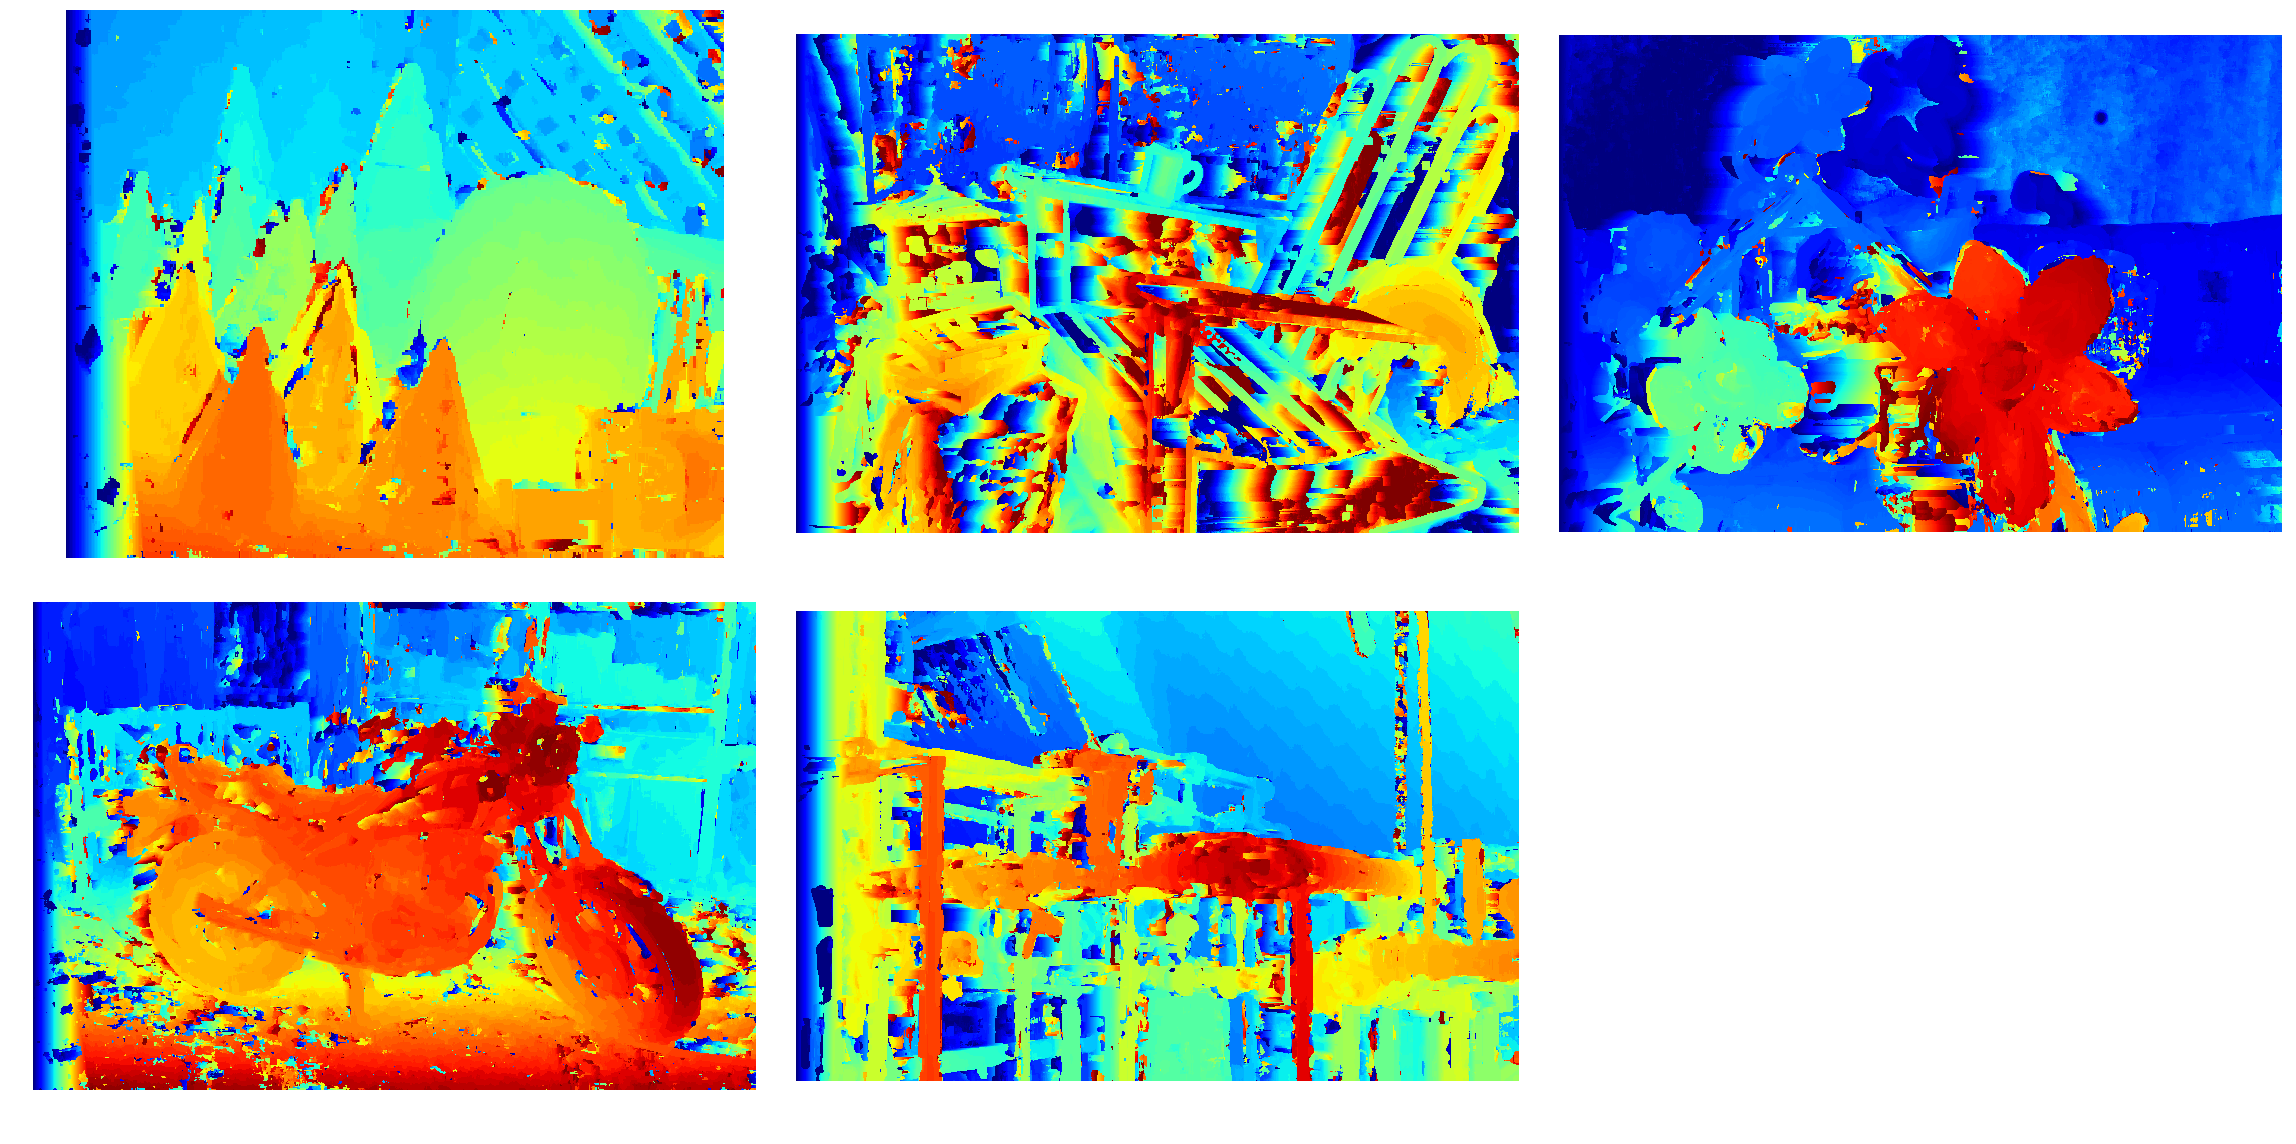

In [149]:
import proj
import stereo as st
import cv2
import matplotlib.pyplot as plt
import os

%matplotlib inline
%load_ext autoreload
%autoreload 2

num_images = len(proj.REPORT_IMAGES)
fig, axarr = plt.subplots(math.ceil(num_images / 3), 3, figsize=(32,16))
i = 0
for image_pair in proj.REPORT_IMAGES:
    disparity, _, _, _ = proj.process_image_pair(image_pair, generate_ssd=True)
    ax = axarr[i // 3, i % 3]
    ax.imshow(proj.disparity_to_jet(disparity, bgr=False))
    ax.axis('off')
    i += 1
    
plt.axis('off')
plt.tight_layout()
fig.show()

### Analysis
Not too shabby! Though each image is clearly recognizable, this simple method exhibits the classic problem with naive SSD methods: streakiness or splotchiness. This is especially noticable in the images of the chair, flower, and the floor around the motorcycle. The streaks can be attributed to the fact that the

- no oocclusion
- duplicate matches
- window size

### Performance
| SSD Performance | Adirondack | Flowers | Motorcycle | Pipes |
|-----------------|------------|---------|------------|-------|
| Accuracy (%)    | 33.5       | 40.8    | 62.4       | 57.2  |

# Graph Cuts
## Algorithm
## Implementation
## Results
### Analysis
### Performance
# Method Comparison

# Future Improvements

# References
1. D. Scharstein, H. Hirschmüller, Y. Kitajima, G. Krathwohl, N. Nesic, X. Wang, and P. Westling. High-resolution stereo datasets with subpixel-accurate ground truth. In German Conference on Pattern Recognition (GCPR 2014), Münster, Germany, September 2014.
2. Image Proximity Measures. (2018). Retrieved from https://software.intel.com/en-us/node/504333
3. Boykov, Y., & Kolmogorov, V. (2004). An Experimental Comparison of Min-cut/Max-flow Algorithms for Energy Minimization in Vision. _IEEE Transactions on Pattern Analysis and Machine Intelligence_, 26(9), 1124-1137. doi:10.1109/TPAMI.2004.60
4. Kolmogorov, V., Monasse, P., & Tan, P. (2014). Kolmogorov and Zabih’s Graph Cuts Stereo Matching Algorithm. _Image Processing On Line_, 4, 220-251. doi:10.5201/ipol.2014.97

error: OpenCV(3.4.3) /io/opencv/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


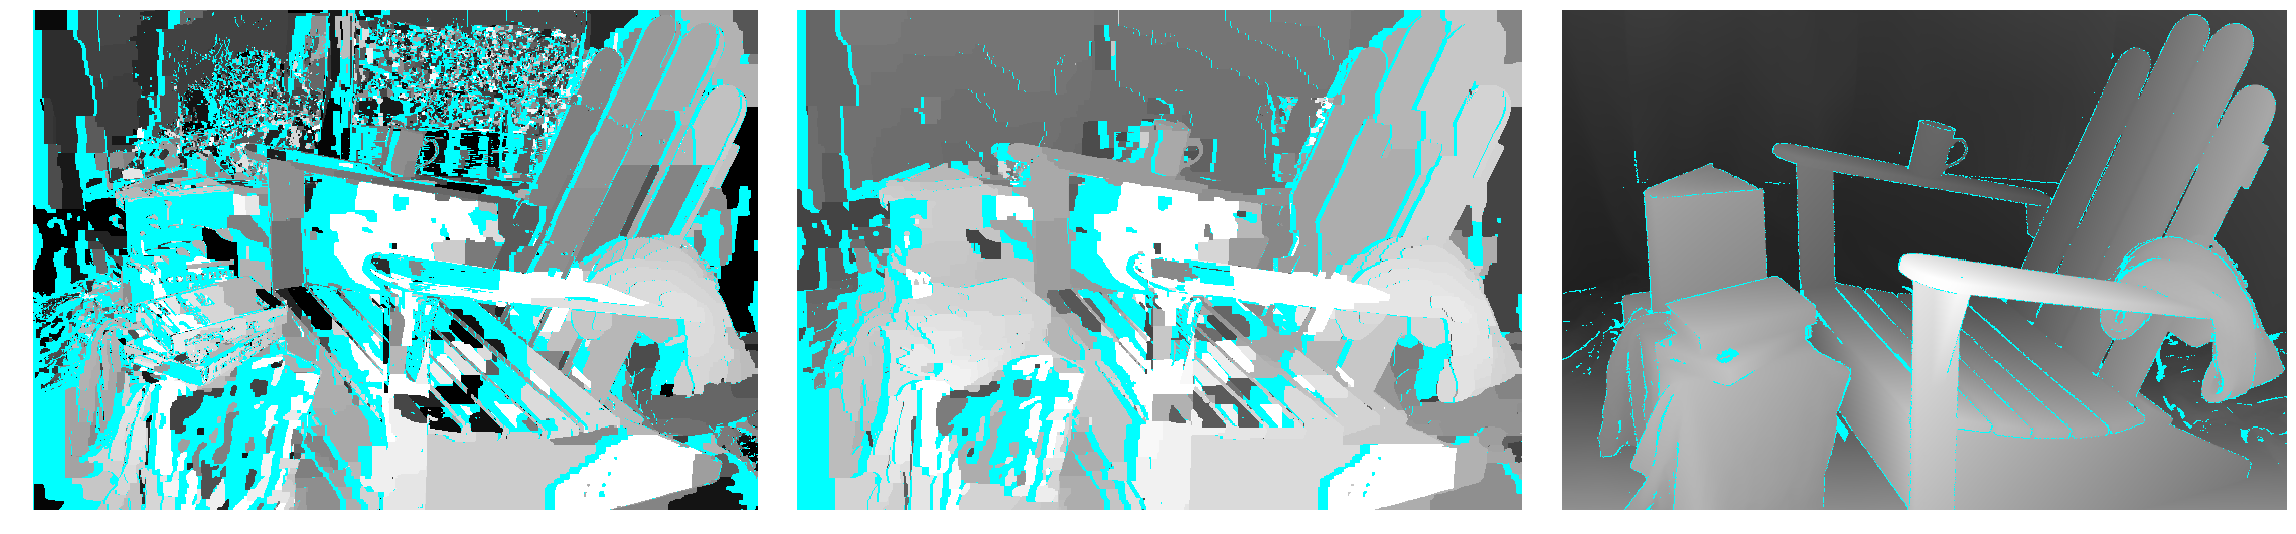

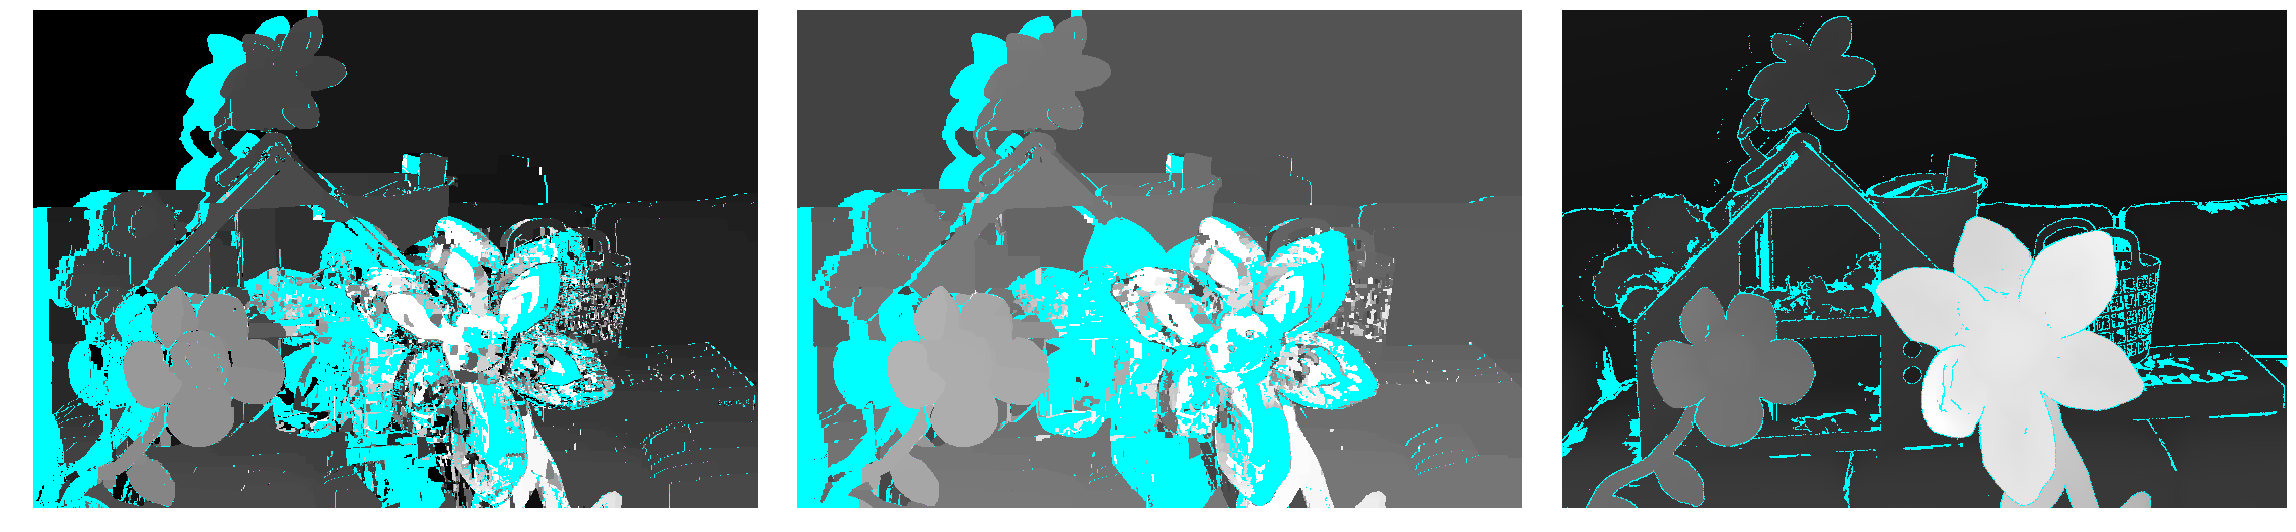

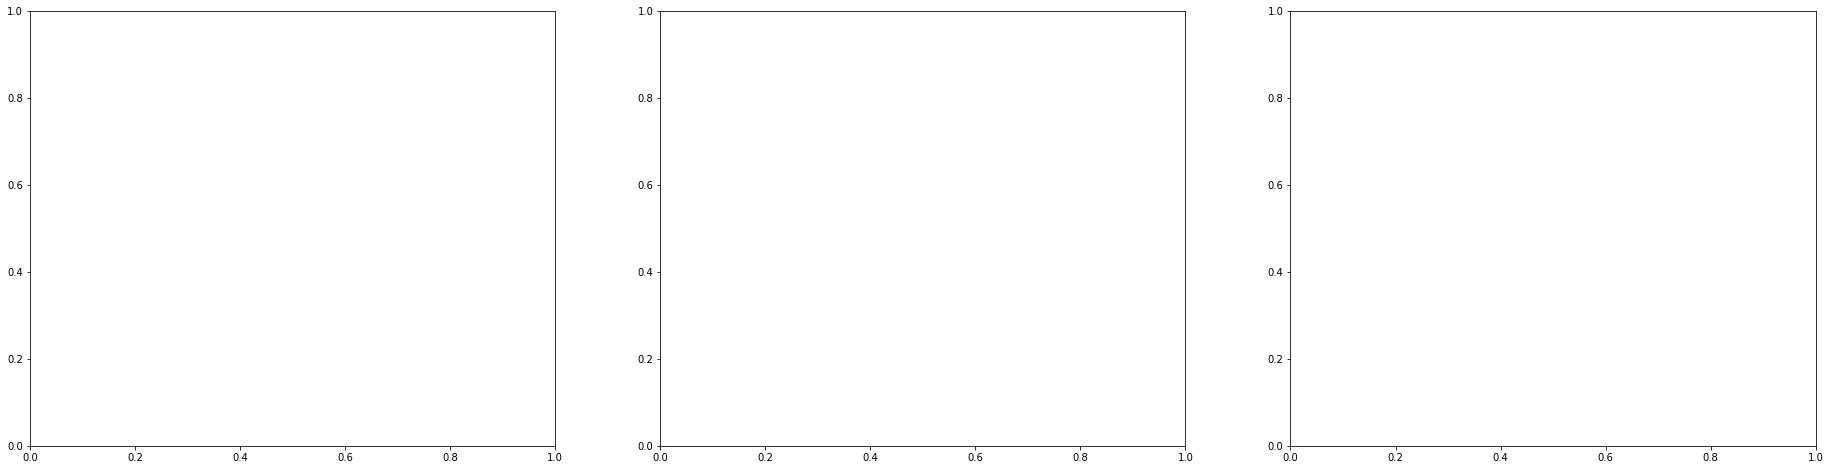

In [152]:
for image_pair in proj.REPORT_IMAGES:
    pfm_scale = proj.REPORT_IMAGES[image_pair][2]
    if pfm_scale is None:
        continue
    
    fig, axarr = plt.subplots(1, 3, figsize=(32,8))
    graphcut = cv2.imread(os.path.join(proj.OUTPUT_DIR, image_pair, 'graphcut-gray.png'))
    kz2 = cv2.imread(os.path.join(proj.OUTPUT_DIR, image_pair, 'kz2.png'))
    ground_truth = proj.load_pfm(os.path.join(proj.IMAGES_DIR, image_pair, 'disp0.pfm'), pfm_scale)
    
    axarr[0].imshow(cv2.cvtColor(graphcut, cv2.COLOR_BGR2RGB))
    axarr[1].imshow(cv2.cvtColor(kz2, cv2.COLOR_BGR2RGB))
    axarr[2].imshow(proj.disparity_to_gray(ground_truth, bgr=False))
    for i in range(3):
        axarr[i].axis('off')
    
    plt.axis('off')
    plt.tight_layout()
    fig.show()

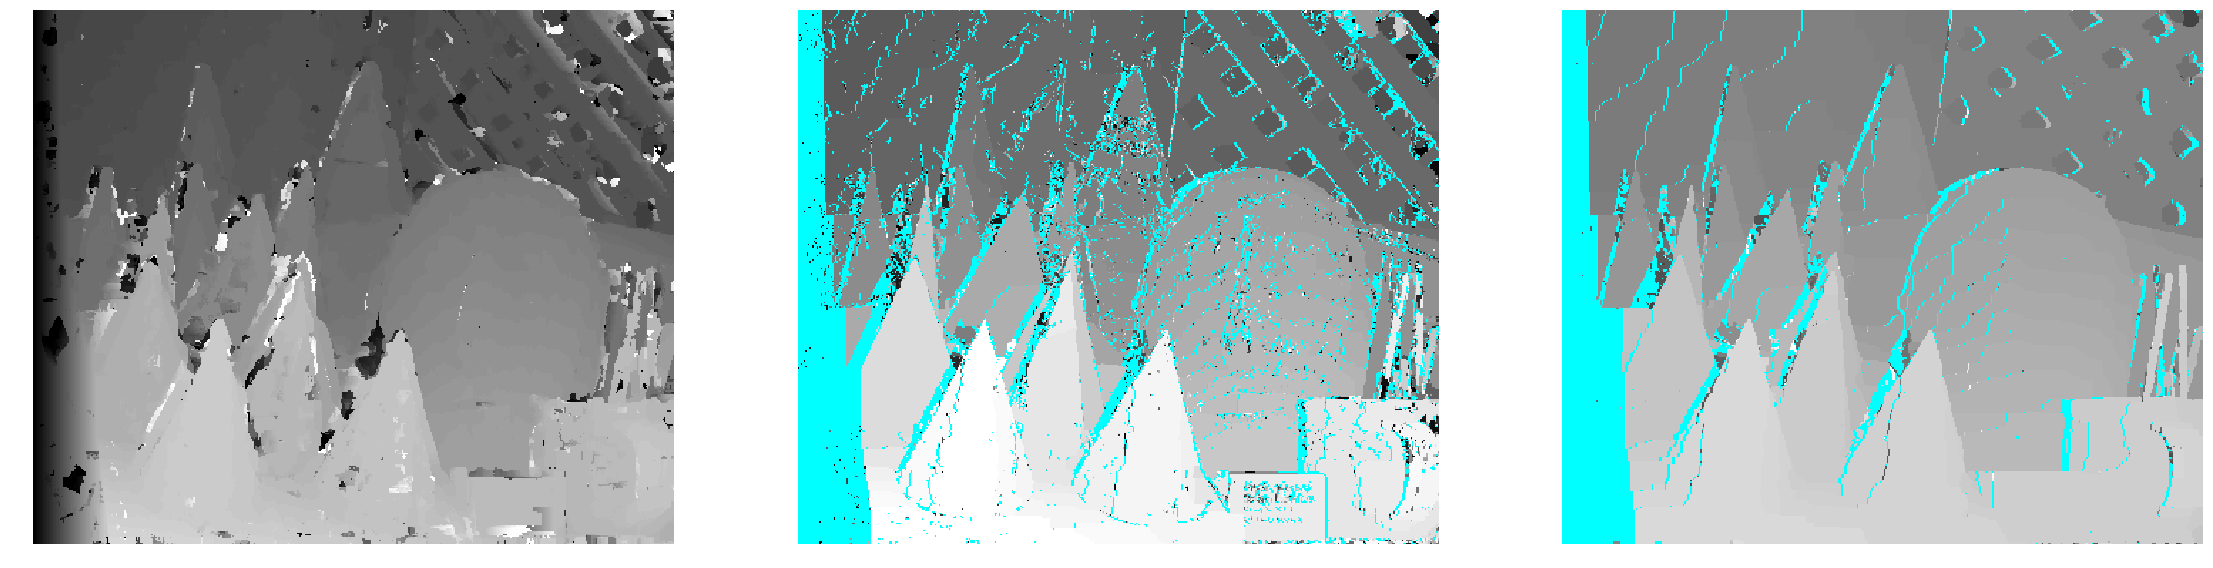

In [156]:
fig, axarr = plt.subplots(1, 3, figsize=(32,8))
image_pair = 'cones'
ssd = cv2.imread(os.path.join(proj.OUTPUT_DIR, image_pair, 'ssd-gray.png'))
graphcut = cv2.imread(os.path.join(proj.OUTPUT_DIR, image_pair, 'graphcut-gray.png'))
kz2 = cv2.imread(os.path.join(proj.OUTPUT_DIR, image_pair, 'kz2.png'))

axarr[0].imshow(cv2.cvtColor(ssd, cv2.COLOR_BGR2RGB))
axarr[1].imshow(cv2.cvtColor(graphcut, cv2.COLOR_BGR2RGB))
axarr[2].imshow(cv2.cvtColor(kz2, cv2.COLOR_BGR2RGB))
for i in range(3):
    axarr[i].axis('off')

plt.axis('off')
plt.tight_layout()
fig.show()